In [117]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [119]:
import imp

common_ds = imp.load_source('common_ds','../common_ds.py')

In [120]:
df = pd.read_csv('data.csv')
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [121]:
def diff(first, second):
        second = set(second)
        return [item for item in first if item not in second]

In [122]:
subcolumns= diff(df.columns, ['Id', 'SalePrice'])

In [123]:
def map_sale_price(price):
    if price > 180000:
        return 1
    else:
        return 0

In [124]:
df['SalePrice'] = [map_sale_price(price) for price in df['SalePrice']]

In [125]:
#df = df[(df['SalePrice'] < 30) & (df['SalePrice'] > 10)]
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,1
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,1
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,0


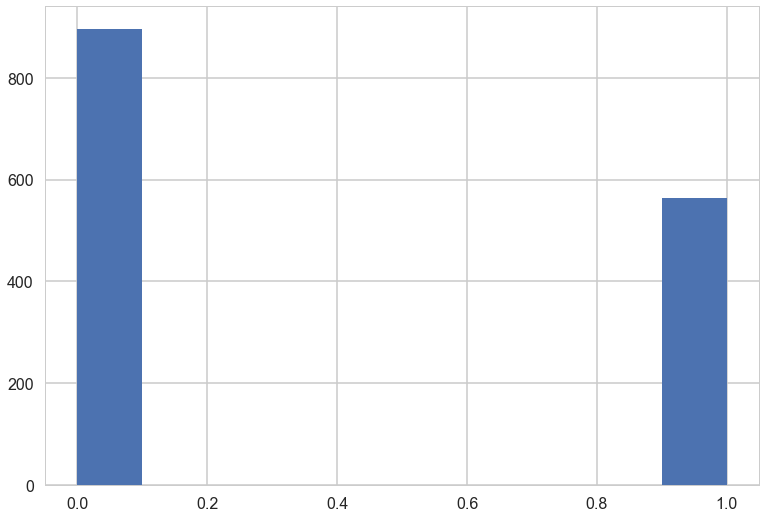

In [126]:
df['SalePrice'].hist()

In [127]:
X_train, y_train, Y_train, y_test = train_test_split(df[subcolumns], df['SalePrice'], test_size=0.2, random_state=42, stratify=df['SalePrice'])

In [128]:
from sklearn.model_selection import train_test_split
itrain, y_train, itest, y_test = train_test_split(xrange(df.shape[0]), df['SalePrice'], train_size=0.8, random_state=42, stratify=df['SalePrice'])
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [129]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": range(5, 10), 'min_samples_leaf': range(1, 10)}
clfTree1, Xtrain, ytrain, Xtest, ytest = common_ds.do_classify(clfTree1, parameters, df, 
                                                     subcolumns,'SalePrice', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/local/Cellar/python/2.7.12/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/usr/local/Cellar/python/2.7.12/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x10846ca30, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/ozero...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x10846ca30, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/ozero...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn import tree\nclfTree1 = tree.Deci...     mask=mask, n_jobs = 4, score_func = \'f1\')', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2017-02-28T15:00:04.286246', u'msg_id': u'FA7875D1207B428F8F64E1CD4E7E2B4F', u'msg_type': u'execute_request', u'session': u'52035E5DFB5348CD9BE9581B4EB183B8', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'FA7875D1207B428F8F64E1CD4E7E2B4F', 'msg_type': u'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['52035E5DFB5348CD9BE9581B4EB183B8']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn import tree\nclfTree1 = tree.Deci...     mask=mask, n_jobs = 4, score_func = \'f1\')', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2017-02-28T15:00:04.286246', u'msg_id': u'FA7875D1207B428F8F64E1CD4E7E2B4F', u'msg_type': u'execute_request', u'session': u'52035E5DFB5348CD9BE9581B4EB183B8', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'FA7875D1207B428F8F64E1CD4E7E2B4F', 'msg_type': u'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['52035E5DFB5348CD9BE9581B4EB183B8'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn import tree\nclfTree1 = tree.Deci...     mask=mask, n_jobs = 4, score_func = \'f1\')', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2017-02-28T15:00:04.286246', u'msg_id': u'FA7875D1207B428F8F64E1CD4E7E2B4F', u'msg_type': u'execute_request', u'session': u'52035E5DFB5348CD9BE9581B4EB183B8', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'FA7875D1207B428F8F64E1CD4E7E2B4F', 'msg_type': u'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'from sklearn import tree\nclfTree1 = tree.Deci...     mask=mask, n_jobs = 4, score_func = \'f1\')', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'from sklearn import tree\nclfTree1 = tree.Deci...     mask=mask, n_jobs = 4, score_func = \'f1\')'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'from sklearn import tree\nclfTree1 = tree.Deci...     mask=mask, n_jobs = 4, score_func = \'f1\')',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'from sklearn import tree\nclfTree1 = tree.Deci...     mask=mask, n_jobs = 4, score_func = \'f1\')',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'from sklearn import tree\nclfTree1 = tree.Deci...     mask=mask, n_jobs = 4, score_func = \'f1\')', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-129-b4ed27c192f4>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 10f4a7ed0, execution_..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x10f7391b0, file "<ipython-input-129-b4ed27c192f4>", line 5>
        result = <ExecutionResult object at 10f4a7ed0, execution_..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x10f7391b0, file "<ipython-input-129-b4ed27c192f4>", line 5>, result=<ExecutionResult object at 10f4a7ed0, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x10f7391b0, file "<ipython-input-129-b4ed27c192f4>", line 5>
        self.user_global_ns = {'In': ['', u"import warnings\nwarnings.filterwarnings('ignore')", u'get_ipython().magic(u\'matplotlib inline\')\n\... improved plots\nfrom matplotlib import rcParams', u"import imp\n\ncommon_ds = imp.load_source('common_ds','../common_ds.py')", u"df = pd.read_csv('data.csv')\ndf.head()", u"from sklearn.model_selection import train_test...nmask[itrain]=1\nmask[itest]=0\nmask = (mask==1)", u'from sklearn import tree\nclfTree1 = tree.DecisionTreeClassifier()', u"from sklearn.model_selection import train_test...nmask[itrain]=1\nmask[itest]=0\nmask = (mask==1)", u'from sklearn import tree\nclfTree1 = tree.DecisionTreeClassifier()', u'df.columns', u'print df.columns', u"print df.columns - ['Id', 'SalePrice']", u'def diff(first, second):\n        second = set...n [item for item in first if item not in second]', u"print diff(df.columns, ['Id', 'SalePrice'])", u"X_train, y_train, Y_train, y_test = train_test...=0.2, random_state=42, stratify=df['SalePrice'])", u"subcolumns= diff(df.columns, ['Id', 'SalePrice'])", u"X_train, y_train, Y_train, y_test = train_test...=0.2, random_state=42, stratify=df['SalePrice'])", u'df[subcolumns]', u"X_train, y_train, Y_train, y_test = train_test...=0.2, random_state=42, stratify=df['SalePrice'])", u"X_train, y_train, Y_train, y_test = train_test...df['SalePrice'], test_size=0.2, random_state=42)", ...], 'Out': {4:    Id  MSSubClass MSZoning  LotFrontage  LotArea...       Normal     250000  

[5 rows x 81 columns], 9: Index([u'Id', u'MSSubClass', u'MSZoning', u'LotF...eCondition', u'SalePrice'],
      dtype='object'), 17:       MSSubClass MSZoning  LotFrontage  LotArea ... 
1459         Normal  

[1460 rows x 79 columns], 20: <bound method Series.hist_series of 0       2085...125
1459    147500
Name: SalePrice, dtype: int64>, 21: <matplotlib.axes._subplots.AxesSubplot object>, 22: <matplotlib.axes._subplots.AxesSubplot object>, 23: <matplotlib.axes._subplots.AxesSubplot object>, 26: 0       None
1       None
2       None
3       N... None
1459    None
Name: SalePrice, dtype: object, 27:    Id  MSSubClass MSZoning  LotFrontage  LotArea...       Normal         25  

[5 rows x 81 columns], 28: 0       20
1       18
2       22
3       14
4   ...58    14
1459    14
Name: SalePrice, dtype: int64, ...}, 'X_train':       MSSubClass MSZoning  LotFrontage  LotArea ... 
261         Partial  

[1168 rows x 79 columns], 'Y_train': 914     0
1399    0
1308    0
650     1
87      ...451     1
261     1
Name: SalePrice, dtype: int64, '_': <matplotlib.axes._subplots.AxesSubplot object>, '_102':                 Id   MSSubClass  LotFrontage    ...0  
max    755000.000000  

[8 rows x 38 columns], '_107':         Id  MSSubClass MSZoning  LotFrontage  Lo...    Normal          0  

[1460 rows x 81 columns], '_108': <matplotlib.axes._subplots.AxesSubplot object>, '_109': (1460, 81), '_113': 0       1
1       1
2       1
3       0
4       ...1458    0
1459    0
Name: SalePrice, dtype: int64, ...}
        self.user_ns = {'In': ['', u"import warnings\nwarnings.filterwarnings('ignore')", u'get_ipython().magic(u\'matplotlib inline\')\n\... improved plots\nfrom matplotlib import rcParams', u"import imp\n\ncommon_ds = imp.load_source('common_ds','../common_ds.py')", u"df = pd.read_csv('data.csv')\ndf.head()", u"from sklearn.model_selection import train_test...nmask[itrain]=1\nmask[itest]=0\nmask = (mask==1)", u'from sklearn import tree\nclfTree1 = tree.DecisionTreeClassifier()', u"from sklearn.model_selection import train_test...nmask[itrain]=1\nmask[itest]=0\nmask = (mask==1)", u'from sklearn import tree\nclfTree1 = tree.DecisionTreeClassifier()', u'df.columns', u'print df.columns', u"print df.columns - ['Id', 'SalePrice']", u'def diff(first, second):\n        second = set...n [item for item in first if item not in second]', u"print diff(df.columns, ['Id', 'SalePrice'])", u"X_train, y_train, Y_train, y_test = train_test...=0.2, random_state=42, stratify=df['SalePrice'])", u"subcolumns= diff(df.columns, ['Id', 'SalePrice'])", u"X_train, y_train, Y_train, y_test = train_test...=0.2, random_state=42, stratify=df['SalePrice'])", u'df[subcolumns]', u"X_train, y_train, Y_train, y_test = train_test...=0.2, random_state=42, stratify=df['SalePrice'])", u"X_train, y_train, Y_train, y_test = train_test...df['SalePrice'], test_size=0.2, random_state=42)", ...], 'Out': {4:    Id  MSSubClass MSZoning  LotFrontage  LotArea...       Normal     250000  

[5 rows x 81 columns], 9: Index([u'Id', u'MSSubClass', u'MSZoning', u'LotF...eCondition', u'SalePrice'],
      dtype='object'), 17:       MSSubClass MSZoning  LotFrontage  LotArea ... 
1459         Normal  

[1460 rows x 79 columns], 20: <bound method Series.hist_series of 0       2085...125
1459    147500
Name: SalePrice, dtype: int64>, 21: <matplotlib.axes._subplots.AxesSubplot object>, 22: <matplotlib.axes._subplots.AxesSubplot object>, 23: <matplotlib.axes._subplots.AxesSubplot object>, 26: 0       None
1       None
2       None
3       N... None
1459    None
Name: SalePrice, dtype: object, 27:    Id  MSSubClass MSZoning  LotFrontage  LotArea...       Normal         25  

[5 rows x 81 columns], 28: 0       20
1       18
2       22
3       14
4   ...58    14
1459    14
Name: SalePrice, dtype: int64, ...}, 'X_train':       MSSubClass MSZoning  LotFrontage  LotArea ... 
261         Partial  

[1168 rows x 79 columns], 'Y_train': 914     0
1399    0
1308    0
650     1
87      ...451     1
261     1
Name: SalePrice, dtype: int64, '_': <matplotlib.axes._subplots.AxesSubplot object>, '_102':                 Id   MSSubClass  LotFrontage    ...0  
max    755000.000000  

[8 rows x 38 columns], '_107':         Id  MSSubClass MSZoning  LotFrontage  Lo...    Normal          0  

[1460 rows x 81 columns], '_108': <matplotlib.axes._subplots.AxesSubplot object>, '_109': (1460, 81), '_113': 0       1
1       1
2       1
3       0
4       ...1458    0
1459    0
Name: SalePrice, dtype: int64, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/ozeron/code/ml/datascienceua_homeworks/hw11/<ipython-input-129-b4ed27c192f4> in <module>()
      2 clfTree1 = tree.DecisionTreeClassifier()
      3 
      4 parameters = {"max_depth": range(5, 10), 'min_samples_leaf': range(1, 10)}
      5 clfTree1, Xtrain, ytrain, Xtest, ytest = common_ds.do_classify(clfTree1, parameters, df, 
      6                                                      subcolumns,'SalePrice', 1, 
----> 7                                                      mask=mask, n_jobs = 4, score_func = 'f1')
      8 
      9 
     10 
     11 

...........................................................................
/Users/ozeron/code/ml/datascienceua_homeworks/common_ds.py in do_classify(clf=DecisionTreeClassifier(class_weight=None, criter...resort=False, random_state=None, splitter='best'), parameters={'max_depth': [5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}, indf=        Id  MSSubClass MSZoning  LotFrontage  Lo...    Normal          0  

[1460 rows x 81 columns], featurenames=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', ...], targetname='SalePrice', target1val=1, mask=array([False, False,  True, ...,  True,  True,  True], dtype=bool), reuse_split=None, score_func='f1', n_folds=5, n_jobs=4)
    102         print "using reuse split"
    103         Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split[
    104             'ytrain'], reuse_split['ytest']
    105     if parameters:
    106         clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds,
--> 107                           score_func=score_func)
        score_func = 'f1'
    108     clf = clf.fit(Xtrain, ytrain)
    109     training_accuracy = clf.score(Xtrain, ytrain)
    110     test_accuracy = clf.score(Xtest, ytest)
    111     print "############# based on standard predict ################"

...........................................................................
/Users/ozeron/code/ml/datascienceua_homeworks/common_ds.py in cv_optimize(clf=DecisionTreeClassifier(class_weight=None, criter...resort=False, random_state=None, splitter='best'), parameters={'max_depth': [5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}, X=array([[60, 'RL', 68.0, ..., 2008, 'WD', 'Normal... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object), y=array([1, 0, 1, ..., 1, 0, 0]), n_jobs=4, n_folds=5, score_func='f1')
     44     """
     45     if score_func:
     46         gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
     47     else:
     48         gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
---> 49     gs.fit(X, y)
        gs.fit = <bound method GridSearchCV.fit of GridSearchCV(c...rain_score=True,
       scoring='f1', verbose=0)>
        X = array([[60, 'RL', 68.0, ..., 2008, 'WD', 'Normal... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object)
        y = array([1, 0, 1, ..., 1, 0, 0])
     50     print "BEST", gs.best_params_, gs.best_score_
     51     best = gs.best_estimator_
     52     return best
     53 

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e...train_score=True,
       scoring='f1', verbose=0), X=array([[60, 'RL', 68.0, ..., 2008, 'WD', 'Normal... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object), y=array([1, 0, 1, ..., 1, 0, 0]), groups=None)
    940 
    941         groups : array-like, with shape (n_samples,), optional
    942             Group labels for the samples used while splitting the dataset into
    943             train/test set.
    944         """
--> 945         return self._fit(X, y, groups, ParameterGrid(self.param_grid))
        self._fit = <bound method GridSearchCV._fit of GridSearchCV(...rain_score=True,
       scoring='f1', verbose=0)>
        X = array([[60, 'RL', 68.0, ..., 2008, 'WD', 'Normal... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object)
        y = array([1, 0, 1, ..., 1, 0, 0])
        groups = None
        self.param_grid = {'max_depth': [5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
    946 
    947 
    948 class RandomizedSearchCV(BaseSearchCV):
    949     """Randomized search on hyper parameters.

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/sklearn/model_selection/_search.py in _fit(self=GridSearchCV(cv=5, error_score='raise',
       e...train_score=True,
       scoring='f1', verbose=0), X=array([[60, 'RL', 68.0, ..., 2008, 'WD', 'Normal... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object), y=array([1, 0, 1, ..., 1, 0, 0]), groups=None, parameter_iterable=<sklearn.model_selection._search.ParameterGrid object>)
    559                                   fit_params=self.fit_params,
    560                                   return_train_score=self.return_train_score,
    561                                   return_n_test_samples=True,
    562                                   return_times=True, return_parameters=True,
    563                                   error_score=self.error_score)
--> 564           for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.model_selection._search.ParameterGrid object>
    565           for train, test in cv_iter)
    566 
    567         # if one choose to see train score, "out" will contain train score info
    568         if self.return_train_score:

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object <genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Feb 28 15:00:04 2017
PID: 20070     Python 2.7.12: /Users/ozeron/.virtualenvs/dsua/bin/python2.7
...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (DecisionTreeClassifier(class_weight=None, criter...resort=False, random_state=None, splitter='best'), array([[60, 'RL', 68.0, ..., 2008, 'WD', 'Normal... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object), array([1, 0, 1, ..., 1, 0, 0]), make_scorer(f1_score), array([ 279,  280,  281, ..., 1455, 1456, 1457]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 289,
       290, 292, 293, 294, 296, 297, 298]), 0, {'max_depth': 5, 'min_samples_leaf': 1})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': True, 'return_times': True, 'return_train_score': True}
        self.items = [(<function _fit_and_score>, (DecisionTreeClassifier(class_weight=None, criter...resort=False, random_state=None, splitter='best'), array([[60, 'RL', 68.0, ..., 2008, 'WD', 'Normal... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object), array([1, 0, 1, ..., 1, 0, 0]), make_scorer(f1_score), array([ 279,  280,  281, ..., 1455, 1456, 1457]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 289,
       290, 292, 293, 294, 296, 297, 298]), 0, {'max_depth': 5, 'min_samples_leaf': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': True, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=DecisionTreeClassifier(class_weight=None, criter...resort=False, random_state=None, splitter='best'), X=array([[60, 'RL', 68.0, ..., 2008, 'WD', 'Normal... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object), y=array([1, 0, 1, ..., 1, 0, 0]), scorer=make_scorer(f1_score), train=array([ 279,  280,  281, ..., 1455, 1456, 1457]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 289,
       290, 292, 293, 294, 296, 297, 298]), verbose=0, parameters={'max_depth': 5, 'min_samples_leaf': 1}, fit_params={}, return_train_score=True, return_parameters=True, return_n_test_samples=True, return_times=True, error_score='raise')
    233 
    234     try:
    235         if y_train is None:
    236             estimator.fit(X_train, **fit_params)
    237         else:
--> 238             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method DecisionTreeClassifier.fit of Deci...esort=False, random_state=None, splitter='best')>
        X_train = array([[20, 'FV', 60.0, ..., 2006, 'New', 'Parti... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object)
        y_train = array([1, 1, 1, ..., 1, 0, 0])
        fit_params = {}
    239 
    240     except Exception as e:
    241         # Note fit time as time until error
    242         fit_time = time.time() - start_time

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...resort=False, random_state=None, splitter='best'), X=array([[20, 'FV', 60.0, ..., 2006, 'New', 'Parti... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object), y=array([1, 1, 1, ..., 1, 0, 0]), sample_weight=None, check_input=True, X_idx_sorted=None)
    734 
    735         super(DecisionTreeClassifier, self).fit(
    736             X, y,
    737             sample_weight=sample_weight,
    738             check_input=check_input,
--> 739             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    740         return self
    741 
    742 
    743     def predict_proba(self, X, check_input=True):

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...resort=False, random_state=None, splitter='best'), X=array([[20, 'FV', 60.0, ..., 2006, 'New', 'Parti... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object), y=array([1, 1, 1, ..., 1, 0, 0]), sample_weight=None, check_input=True, X_idx_sorted=None)
    117     def fit(self, X, y, sample_weight=None, check_input=True,
    118             X_idx_sorted=None):
    119 
    120         random_state = check_random_state(self.random_state)
    121         if check_input:
--> 122             X = check_array(X, dtype=DTYPE, accept_sparse="csc")
        X = array([[20, 'FV', 60.0, ..., 2006, 'New', 'Parti... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object)
    123             y = check_array(y, ensure_2d=False, dtype=None)
    124             if issparse(X):
    125                 X.sort_indices()
    126 

...........................................................................
/Users/ozeron/.virtualenvs/dsua/lib/python2.7/site-packages/sklearn/utils/validation.py in check_array(array=array([[20, 'FV', 60.0, ..., 2006, 'New', 'Parti... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object), accept_sparse=['csc'], dtype=<type 'numpy.float32'>, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    377 
    378     if sp.issparse(array):
    379         array = _ensure_sparse_format(array, accept_sparse, dtype, copy,
    380                                       force_all_finite)
    381     else:
--> 382         array = np.array(array, dtype=dtype, order=order, copy=copy)
        array = array([[20, 'FV', 60.0, ..., 2006, 'New', 'Parti... 75.0, ..., 2008, 'WD', 'Normal']], dtype=object)
        dtype = <type 'numpy.float32'>
        order = None
        copy = False
    383 
    384         if ensure_2d:
    385             if array.ndim == 1:
    386                 if ensure_min_samples >= 2:

ValueError: could not convert string to float: Normal
___________________________________________________________________________

In [116]:
(df['SalePrice'].values == 1) * 1

array([1, 1, 1, ..., 1, 0, 0])